Climate Control: Linear Regression

Much of the following code was provided by the illustrious Dr. Grimshaw. 

Research Task: Decide if there is a statistically significant greenhouse gas effect, and 
predict the temperature for the next 12 months, based on our model.

Data Features: To do this analysis I wrangled data from a temperature, co2, and methane datasets. I combined them to form a single
dataset with one response variable (temp), and several explanatory variables (methane, co2), all of
which were quantitative. When I plotted each explanatory variable against the response 
variable, the data showed a linear trend.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
#Data about temperature
temp = pd.read_csv("/Users/ward60/Documents/temp.txt", sep="\s+")
temp = temp.iloc[:,1:13]
temp.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-10,-14,1,18,19,5,-2,3,9,13,13,28
1,9,22,8,9,-4,-2,-2,-9,11,6,2,-12
2,-2,-20,-17,-8,-5,-19,-11,-3,-4,-6,-5,-9
3,-24,-16,2,0,-4,6,1,17,2,9,4,19
4,29,31,27,26,25,17,10,3,10,14,6,-6


In [4]:
#Reshape Df
temp1 = pd.DataFrame(np.matrix(temp).reshape(588,1))
#Add months to df
months = [1,2,3,4,5,6,7,8,9,10,11,12]
temp1["month"] = months*49
#Add years to df
years = list(range(1969,2018))
temp1["year"] = np.repeat(years, 12)
#Add col name for temp
temp1.columns.values[0]="temp"

In [5]:
#CO2 Data
maunaloa1 = pd.read_csv("/Users/ward60/Documents/manaloa1.txt", sep="\s+")
maunaloa1 = maunaloa1[ ["year", "month", "co2"]]

In [6]:
#Methane Data
methane = pd.read_csv("/Users/ward60/Documents/methane.txt", sep="\s+")
methane = methane[ ["year", "month", "methane"] ]

In [7]:
#Combine to create one dataframe
temp_co2 = pd.merge(temp1, maunaloa1, on=['year', 'month'])
climate = pd.merge(temp_co2, methane, on=['year', 'month'])
climate = climate[['year', 'month', 'temp', 'co2', 'methane']]
climate.head()

,year,month,temp,co2,methane
0,1983,5,36,346.09,1639.23
1,1983,6,20,345.30,1633.53
2,1983,7,17,343.53,1633.19
3,1983,8,33,341.20,1631.38
4,1983,9,39,339.78,1648.43


EDA

In [8]:
#Correlation Coefficient Temp~Methane
climate["temp"].corr(climate['methane'])

0.7590174074397298

Text(0.5,1,'Temp~Methane')

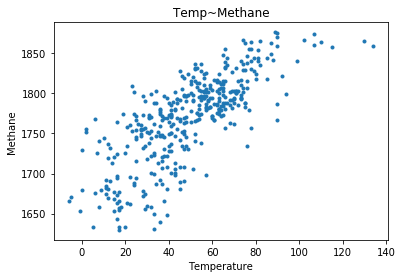

In [9]:
plt.plot(climate['temp'], climate['methane'], '.')
plt.xlabel("Temperature")
plt.ylabel("Methane")
plt.title("Temp~Methane")

In [10]:
#Correlation Coefficient Temp~Methane
climate["temp"].corr(climate['co2'])

0.787587632172703

Text(0.5,1,'Temp~CO2')

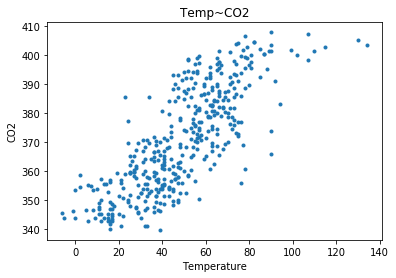

In [11]:
plt.plot(climate['temp'], climate['co2'], '.')
plt.xlabel("Temperature")
plt.ylabel("CO2")
plt.title("Temp~CO2")

Analysis

The response variable is Earth Temp (Monthly).  Our explanatory variables are CO2 (ppm) and Methane (ppb).
This is a observational study. Because we don't have more than one Earth to test on, it is only an observational study. Therefore, we can only conclude correlation, not causation.

Model:
Temp = beta0 + beta1*CO2 + beta2*Methane + epsilon, where epsilon ~ N(0, sigma2)

Assumptions: That the data has a linear correlation, with constant variance, and that the variables have an independent effect.

In [30]:
#fit the model
fitted = smf.ols('temp ~ co2 + methane', data=climate)
results = fitted.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     338.5
Date:                Mon, 30 Jul 2018   Prob (F-statistic):           7.87e-87
Time:                        09:02:21   Log-Likelihood:                -1636.2
No. Observations:                 404   AIC:                             3278.
Df Residuals:                     401   BIC:                             3290.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -393.0410     28.152    -13.961      0.000    -448.386    -337.696
co2            0.7411      0.099      7.478      0.000       0.546       0.936
methane        0.0944      0.033      2.880      0.004       0.030       0.159
==============================================================================
Omnibus:                       10.029   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               12.077
Skew:                           0.261   Prob(JB):                      0.00239
Kurtosis:                       3.667   Cond. No.                     7.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Beta1.hat is the estimated partial slope of co2 (The slope of co2 if we hold methane constant). For a one unit change in CO2 (ppm), there is an estimated expected increase of 0.741 (.01 ºC) in monthly earth temperature, given that methane concentration is constant. 

Beta2.hat is the estimated partial slope of methane ( The slope of methane if we hold co2 constant). For a one unit change in Methane (ppb), there is an estimated expected increase of 0.09444 (.01 ºC) in the earth's month earth temperature, given that co2 concentration is constant. 


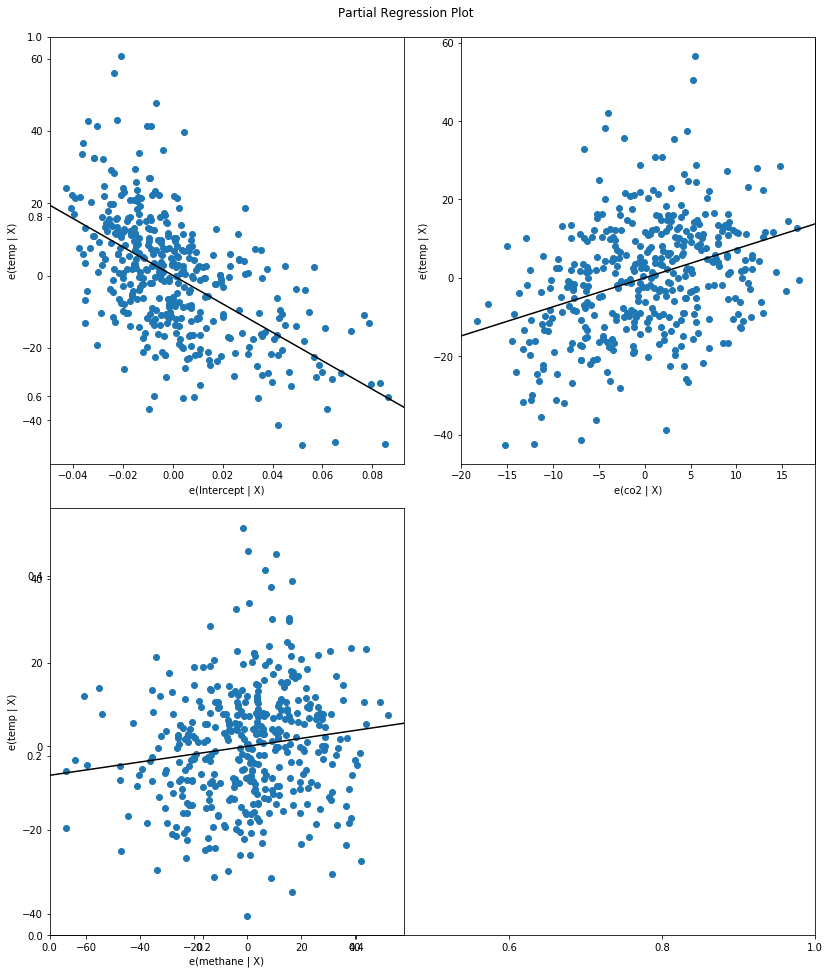

In [42]:
#Create partial regression plots, or added variable plots
fix, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress_grid(results, fig=fix)

Inference:
Is there a statistically significant greenhouse gas effect?


Test H0: neither greenhouse gas has an effect
     HA: at least one greenhouse gas has an effect
ANOVA compares the two models 1. Assuming H0 is true and 2. Assume Ha is true. 
If there is a difference between the two models, we'll reject H0. 

In [47]:
noeffect = smf.ols('temp ~ +1', data=climate).fit()
table = sm.stats.anova_lm(noeffect, results, typ=1) # Type 1 bc we are comparing multiple models
print(table)

   df_resid            ssr  df_diff        ss_diff           F        Pr(>F)
0     403.0  209525.888614      0.0            NaN         NaN           NaN
1     401.0   77945.522648      2.0  131580.365966  338.465411  7.869972e-87


/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


There is a statistically significant greenhouse gas effect (p is < 7.87e-87)

Follow up Analysis: Which gases have an effect?

T Test

H0: Beta1 = Beta2 = 0 

p-values (from the summary table):   
            co2     => 0.000   
            methane => 0.004

95% confidence interval for p-values (from summary table):

   co2: (0.546,  0.936)
    
methane: (0.030,  0.159)

When we compared the two models with the ANOVA test, the pvalue was less than .0001, and so we reject the null that methane and co2 do not have a greenhouse gas effect. In our further analysis, we tested co2 and methane individually to see if each gas individually had a greenhouse gas effect. In our ttest Beta1 had a t statistic of 7.478, with a pvalue 4.79e-13, and therefore CO2 has a significant effect. Beta2 had a statistic of 2.880, with a pvalue of 0.00419, and so methane also has a statistically signficant #greenhouse gas effect. Methane's 
effect was not as significant as the effect of CO2, because Methane's statistic was smaller. These findings were reinforced by the confidence interval that we calculated. Neither co2 or
methane contained 0 in their respective 95% confidence intervals, and therefore both are statistically significant in that regard. Methane had a much smaller confidence interval than co2, which shows again that it is less significant than co2.


Task: Evaluate prediction performance one year into the future

In [51]:
#Separate data into test and train
#train: before last year
climate_train = climate.loc[climate["year"] <= 2015]
climate_train
#test: last year (2016)
climate_test = climate.loc[climate["year"] == 2016]
climate_test

,year,month,temp,co2,methane
392,2016,1,115,402.72,1858.25
393,2016,2,134,403.62,1858.33
394,2016,3,130,405.23,1864.58
395,2016,4,107,407.35,1873.36
396,2016,5,90,407.87,1870.71
397,2016,6,78,406.57,1855.71
398,2016,7,82,404.37,1835.76
399,2016,8,99,401.69,1840.68
400,2016,9,87,400.23,1863.21
401,2016,10,89,401.47,1876.06


In [63]:
#Fit a model on the training data
out_train_climate = smf.ols('temp~co2+methane', data=climate_train).fit()
#Make predictions with the test data
y2016 = out_train_climate.predict(climate_test)
y2016

392    78.488079
393    79.111617
394    80.800813
395    83.076786
396    83.183737
397    80.884648
398    77.504474
399    76.132340
400    77.249751
401    79.305776
402    80.570157
403    80.420060
dtype: float64

Text(0.5,1,'Prediction Performance')

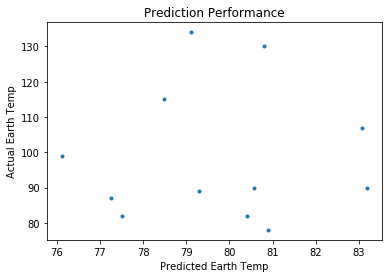

In [64]:
#Evaluate Prediction Performance
plt.plot(y2016, climate_test["temp"], ".")
plt.xlabel("Predicted Earth Temp")
plt.ylabel("Actual Earth Temp")
plt.title("Prediction Performance")